In [2]:
import numpy as numpy
import pandas as pds
import seaborn as sen
import matplotlib.pyplot as mplt
%matplotlib inline

In [3]:
data = pds.read_csv('../data/dataset.csv')
data.head(10)

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1
5,MILLER,0.41,0.50,2,153,3,0,1,0,sales,low,1
6,DAVIS,0.10,0.77,6,247,4,0,1,0,sales,low,1
7,GARCIA,0.92,0.85,5,259,5,0,1,0,sales,low,1
8,RODRIGUEZ,0.89,1.00,5,224,5,0,1,0,sales,low,1
9,WILSON,0.42,0.53,2,142,3,0,1,0,sales,low,1


In [4]:
sen.set_style("darkgrid")
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


In [5]:
mask = numpy.zeros_like(corr,dtype=numpy.bool)
mask

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]], dtype=bool)

In [6]:
numpy.triu_indices_from(mask)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7,
        8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8], dtype=int64))

In [7]:
mask[numpy.triu_indices_from(mask)] =True

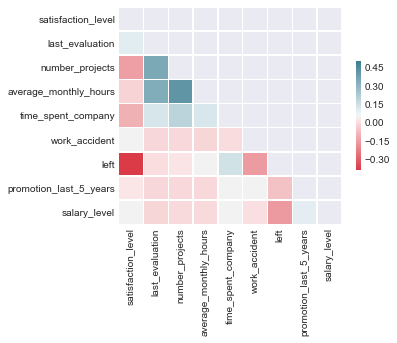

In [8]:
f,ax = mplt.subplots(figsize=(5,4))
cmap = sen.diverging_palette(10,220,as_cmap=True)
sen.heatmap(corr,mask=mask,cmap=cmap,vmax=.5,linewidths=.5,cbar_kws={"shrink":.5},ax=ax)

In [9]:
#### Feature Analyze


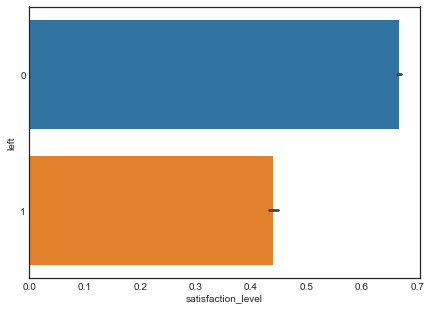

In [10]:
sen.set_style("white")
f,ax =mplt.subplots(figsize=(7,5))
sen.barplot(x=data.satisfaction_level,y=data.left,orient="h",ax=ax)


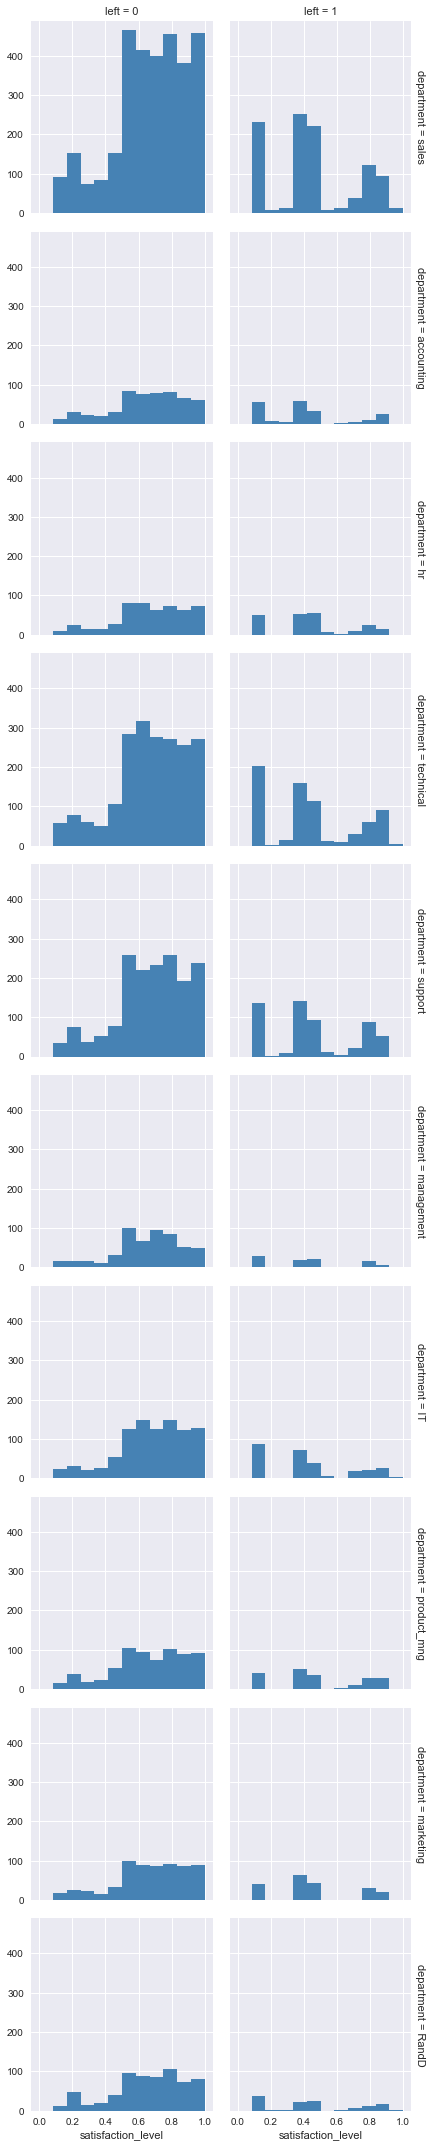

In [12]:
sen.set(style="darkgrid")
g=sen.FacetGrid(data,row="department",col="left",margin_titles=True)
bins = numpy.linspace(0, 1, 13)
g.map(mplt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)
